In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

telco = pd.read_csv("datasets/Telco-Customer-Churn.csv",sep=",")



In [152]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


ValueError: could not convert string to float: 

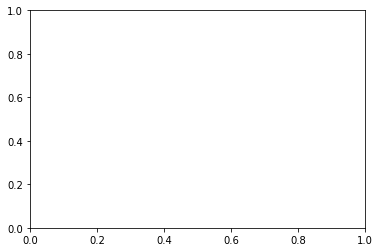

In [219]:
ax=sns.kdeplot(telco.TotalCharges[(telco["Churn"]=='No')],color="Blue",shade=True)
ax=sns.kdeplot(telco.TotalCharges[(telco["Churn"]=='Yes')],ax=ax,color="Green",shade=True)

ax.legend(["Churn within a month", "Not Churn"],loc='upper right')
ax.set_ylabel('amount')
ax.set_xlabel('total charges')
ax.set_title('Total charges vs. Churning')

In [154]:


telco.TotalCharges = pd.to_numeric(telco.TotalCharges,errors='coerce')
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [135]:
telco.dropna(inplace=True)

In [136]:
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2307,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,0
3488,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,0
3845,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,1
5931,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,1
5569,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,1
1207,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,0
2375,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,0
2630,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,0
2278,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,0
4714,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,0


In [141]:
df = telco.iloc[:,1:]

In [142]:
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)

In [143]:
df_dumm = pd.get_dummies(df)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2307,0,9,65.6,593.30,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3488,0,9,59.9,542.40,0,1,0,1,0,0,...,1,1,0,0,1,0,0,0,0,1
3845,0,4,73.9,280.85,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5931,1,13,98.0,1237.85,1,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
5569,1,3,83.9,267.40,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [144]:
y = df_dumm['Churn'].values
X = df_dumm.drop(columns=['Churn'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

/Users/melodylui/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [146]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/melodylui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8104265402843602


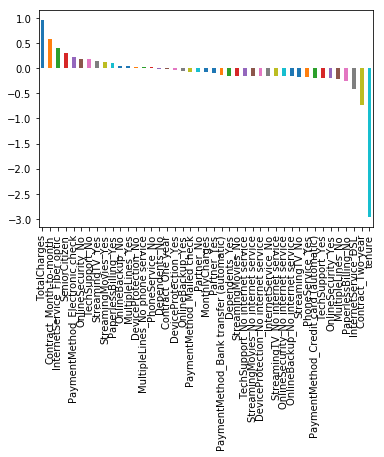

In [213]:
weights=pd.Series(model.coef_[0],index=X.columns.values)
weights=weights.sort_values(ascending=False)
weights.plot(kind='bar')

In [191]:
model.svm=SVC(kernel='linear')
model.svm.fit(X_train,y_train)
hyp=model.svm.predict(X_test)

In [195]:
print('Accuracy score:',accuracy_score(y_test, hyp))

Accuracy score: 0.8071090047393364


In [205]:
print ('F1 score:', f1_score(y_test, hyp,average='macro'))


F1 score: 0.7349392681685448


In [206]:
print ('Recall:', recall_score(y_test, hyp,average='macro'))

Recall: 0.7223766899994308


In [208]:

print ('Precision:', precision_score(y_test, hyp,average='weighted'))



Precision: 0.7984868374553064


In [171]:
results=confusion_matrix(y_test,hyp)

In [172]:
print(results)

[[1402  155]
 [ 252  301]]


In [183]:
average_precision=average_precision_score(y_test,hyp)
print(average_precision)

0.47871953189711336
